__Classification__

1. Binary classification :- Target can be one of two options, e.g. yes or no (Predict whether or not someone has heart disease based on their health parameters.)
2. Multi-class classification :- Target can be one of more than two options (Decide whether a photo is of food, a person or a dog.)
3. Multi-label classification :- Target can be assigned more than one option (Predict what categories should be assigned to a Wikipedia article (e.g. mathematics, science & philosophy).)

#### **Data Preparation**


Using [make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html) from sklearn

In [1]:
import torch
import torch.nn as nn

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [2]:
X, y = make_circles(n_samples=1000,
                    noise = 0.03,
                    random_state = 42)

X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [3]:
circle = pd.DataFrame({'X1':X[:,0],
                       'X2':X[:,1],
                       'label':y})

circle.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [4]:
circle.label.value_counts().reset_index()

,label,count
0,1,500
1,0,500


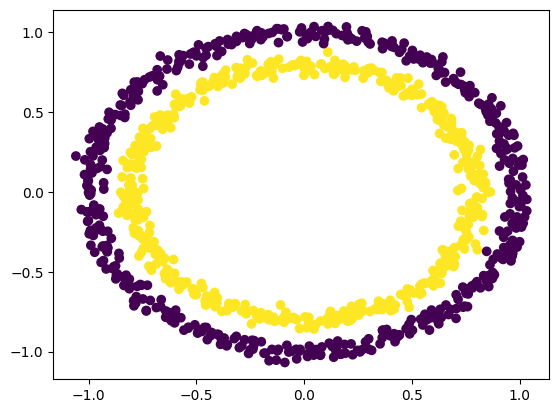

In [5]:
# plotting plot for the X and y


plt.scatter(X[:,0],
            X[:,1],
            c=y)
plt.show()

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
type(X)

numpy.ndarray

In [8]:
# Converting data into torch tensors

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [9]:
type(X)

torch.Tensor

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

len(X_train), len(X_test)

(800, 200)

#### **Building Model**

In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [12]:
class ClassificationModel(nn.Module):

  def __init__(self):
    super().__init__()

    self.Layer1 = nn.Linear(in_features=2, out_features=5) # take 2 features (shape X) and produce 5 features (hidden units/neurons)
    self.Layer2 = nn.Linear(in_features=5, out_features=1) # take 5 features (out of above layer) and produce 1 frature (shape of y)

  def forward(self, X):

    #  computation goes through layer_1 first then the output of layer_1 goes through layer_2
    return self.Layer2(self.Layer1(X))

model0 = ClassificationModel().to(device)
model0

ClassificationModel(
  (Layer1): Linear(in_features=2, out_features=5, bias=True)
  (Layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [13]:
'''
Same can be done using nn.Sequential(), it performs a forward pass computation of the input data through the layers in the order they appear.

model0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

'''

'\nSame can be done using nn.Sequential(), it performs a forward pass computation of the input data through the layers in the order they appear.\n\nmodel0 = nn.Sequential(\n    nn.Linear(in_features=2, out_features=5),\n    nn.Linear(in_features=5, out_features=1)     \n).to(device)\n\n'

In [14]:
'''
for any linear layer ->  nn.Linear(in_features, out_features)

weight shape → (out_features, in_features)
bias shape → (out_features,)

'''

model0.state_dict()

OrderedDict([('Layer1.weight',
              tensor([[-0.1638, -0.2382],
                      [-0.4813, -0.0296],
                      [-0.6757,  0.2152],
                      [ 0.6894, -0.2535],
                      [-0.6603,  0.1791]])),
             ('Layer1.bias',
              tensor([-0.1870,  0.4051,  0.2625, -0.5497, -0.2296])),
             ('Layer2.weight',
              tensor([[ 0.0071,  0.3561,  0.2609, -0.2767, -0.0050]])),
             ('Layer2.bias', tensor([0.4211]))])

__Loss (criterion or cost function) and Optimizer__

In [15]:
loss_fn = nn.BCEWithLogitsLoss() # sigmoid built it
optimizer = torch.optim.SGD(params=model0.parameters(),
                            lr = 0.1)

In [16]:
def accuracy_fn(y_true, y_pred):

  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

#### **Training Model**

logits -> predicton probabilities -> prediction labels

In [17]:
# Let's checkput how model producing outputs before training just for sense check


'''
We can convert our model's raw outputs (logits) to prediction probabilities using a sigmoid activation function and then converted the prediction probabilities
to prediction labels by rounding them.

Note: The use of the sigmoid activation function is often only for binary classification logits.
      For multi-class classification, we'll be looking at using the softmax activation function.


The use of the sigmoid activation function is not required when passing our model's raw outputs to the nn.BCEWithLogitsLoss
(the "logits" in logits loss is because it works on the model's raw logits output), this is because it has a sigmoid function built-in.

'''

y_logits = model0(X_test.to(device)) # the raw outputs of model are often referred to as logits.
print(y_logits[:5])
print('\n')

y_pred_probs = torch.sigmoid(y_logits) # To get our model's raw outputs (logits) into interpretable form (prediction probabilities), we can use the sigmoid activation function.
print(y_pred_probs[:5])
print('\n')

y_preds  = torch.round(y_pred_probs) # turning prediction probabilities into prediction labels
print(y_preds.squeeze()[:5])

tensor([[1.0643],
        [0.8862],
        [1.1271],
        [1.0481],
        [0.4858]], grad_fn=<SliceBackward0>)


tensor([[0.7435],
        [0.7081],
        [0.7553],
        [0.7404],
        [0.6191]], grad_fn=<SliceBackward0>)


tensor([1., 1., 1., 1., 1.], grad_fn=<SliceBackward0>)


__Training and Testing Loop__

In [24]:
torch.manual_seed(42)

epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device),y_test.to(device)


for epoch in range(epochs):

  model0.train()
  y_logits = model0(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_preds)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  model0.eval()
  with torch.inference_mode():
      test_logits = model0(X_test).squeeze()
      test_preds = torch.round(torch.sigmoid(test_logits))

      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_test, test_preds)

  if epoch % 10 == 0:
    print(f'Epoch : {epoch} | Loss : {loss:.5f} | Accuracy : {acc:.2f}% | Test Loss : {test_loss}:.5f | Test Accuracy  : {test_acc:.2f}%')

Epoch : 0 | Loss : 0.69346 | Accuracy : 49.88% | Test Loss : 0.6923955678939819:.5f | Test Accuracy  : 51.00%
Epoch : 10 | Loss : 0.69346 | Accuracy : 49.88% | Test Loss : 0.6923955678939819:.5f | Test Accuracy  : 51.00%
Epoch : 20 | Loss : 0.69346 | Accuracy : 49.88% | Test Loss : 0.6923955678939819:.5f | Test Accuracy  : 51.00%
Epoch : 30 | Loss : 0.69346 | Accuracy : 49.88% | Test Loss : 0.6923955678939819:.5f | Test Accuracy  : 51.00%
Epoch : 40 | Loss : 0.69346 | Accuracy : 49.88% | Test Loss : 0.6923955678939819:.5f | Test Accuracy  : 51.00%
Epoch : 50 | Loss : 0.69346 | Accuracy : 49.88% | Test Loss : 0.6923955678939819:.5f | Test Accuracy  : 51.00%
Epoch : 60 | Loss : 0.69346 | Accuracy : 49.88% | Test Loss : 0.6923955678939819:.5f | Test Accuracy  : 51.00%
Epoch : 70 | Loss : 0.69346 | Accuracy : 49.88% | Test Loss : 0.6923955678939819:.5f | Test Accuracy  : 51.00%
Epoch : 80 | Loss : 0.69346 | Accuracy : 49.88% | Test Loss : 0.6923955678939819:.5f | Test Accuracy  : 51.00%
Ep

In [19]:
# Downloading helper function

import requests

request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
with open('helper_function.py', 'wb') as f:
  f.write(request.content)

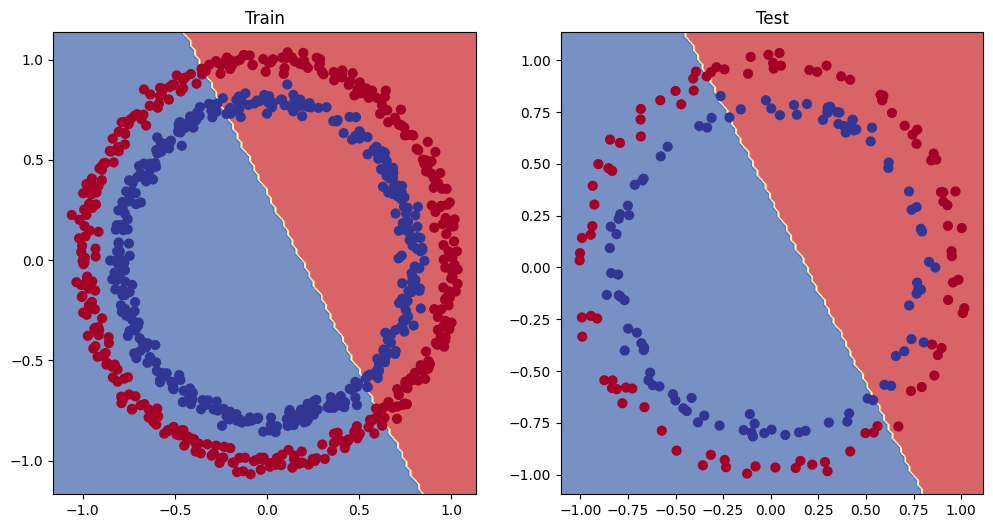

In [20]:
from helper_function import plot_decision_boundary, plot_predictions


# Plot decision boundaries for training and test sets

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model0, X_test, y_test)

Model which we have build is linear but the data is non-linear, so we need to build a non-linear model to capture the pattern in the data.


We'll add a non-linear activation RelU.

In [33]:
class ClassificationNonLinearModel(nn.Module):

  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()


  def forward(self, X):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(X)))))

model1 = ClassificationNonLinearModel().to(device)
model1

ClassificationNonLinearModel(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [34]:
# updating optimizer

optimizer = torch.optim.SGD(params=model1.parameters(),
                            lr = 0.1)

In [39]:
# Training model

torch.manual_seed(42)

epochs = 100

for epoch in range(epochs):

  model1.train()
  y_logits = model1(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_preds)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  model1.eval()
  with torch.inference_mode():
      test_logits = model1(X_test).squeeze()
      test_preds = torch.round(torch.sigmoid(test_logits))

      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_test, test_preds)

  if epoch % 10 == 0:
    print(f'Epoch : {epoch} | Loss : {loss:.5f} | Accuracy : {acc:.2f}% | Test Loss : {test_loss}:.5f | Test Accuracy  : {test_acc:.2f}%')

Epoch : 0 | Loss : 0.02196 | Accuracy : 99.88% | Test Loss : 0.04091140255331993:.5f | Test Accuracy  : 100.00%
Epoch : 10 | Loss : 0.02179 | Accuracy : 99.88% | Test Loss : 0.040657225996255875:.5f | Test Accuracy  : 100.00%
Epoch : 20 | Loss : 0.02162 | Accuracy : 99.88% | Test Loss : 0.040411390364170074:.5f | Test Accuracy  : 100.00%
Epoch : 30 | Loss : 0.02145 | Accuracy : 99.88% | Test Loss : 0.040164753794670105:.5f | Test Accuracy  : 100.00%
Epoch : 40 | Loss : 0.02129 | Accuracy : 99.88% | Test Loss : 0.03993280977010727:.5f | Test Accuracy  : 100.00%
Epoch : 50 | Loss : 0.02113 | Accuracy : 99.88% | Test Loss : 0.03969926759600639:.5f | Test Accuracy  : 100.00%
Epoch : 60 | Loss : 0.02097 | Accuracy : 99.88% | Test Loss : 0.039474986493587494:.5f | Test Accuracy  : 100.00%
Epoch : 70 | Loss : 0.02081 | Accuracy : 99.88% | Test Loss : 0.039251942187547684:.5f | Test Accuracy  : 100.00%
Epoch : 80 | Loss : 0.02066 | Accuracy : 99.88% | Test Loss : 0.039031919091939926:.5f | Tes

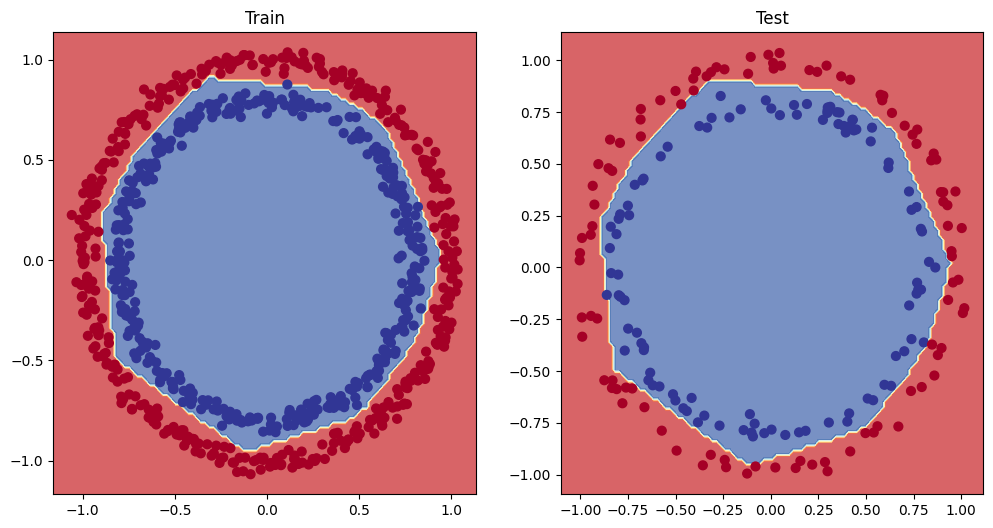

In [40]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model1, X_test, y_test)

Perfect!

Epoch : 0 | Loss : 0.69451 | Accuracy : 47.62% | Test Loss : 0.6963747143745422:.5f | Test Accuracy  : 51.50%
Epoch : 100 | Loss : 0.68934 | Accuracy : 52.25% | Test Loss : 0.6899555325508118:.5f | Test Accuracy  : 51.00%
Epoch : 200 | Loss : 0.68605 | Accuracy : 55.00% | Test Loss : 0.6856629848480225:.5f | Test Accuracy  : 54.50%
Epoch : 300 | Loss : 0.68272 | Accuracy : 56.00% | Test Loss : 0.6822633147239685:.5f | Test Accuracy  : 54.50%
Epoch : 400 | Loss : 0.67935 | Accuracy : 55.38% | Test Loss : 0.6794785857200623:.5f | Test Accuracy  : 54.00%
Epoch : 500 | Loss : 0.67587 | Accuracy : 54.62% | Test Loss : 0.6771133542060852:.5f | Test Accuracy  : 54.00%
Epoch : 600 | Loss : 0.67246 | Accuracy : 55.25% | Test Loss : 0.6745736598968506:.5f | Test Accuracy  : 54.50%
Epoch : 700 | Loss : 0.66896 | Accuracy : 57.12% | Test Loss : 0.6717380285263062:.5f | Test Accuracy  : 56.00%
Epoch : 800 | Loss : 0.66520 | Accuracy : 58.50% | Test Loss : 0.668454647064209:.5f | Test Accuracy  : 58

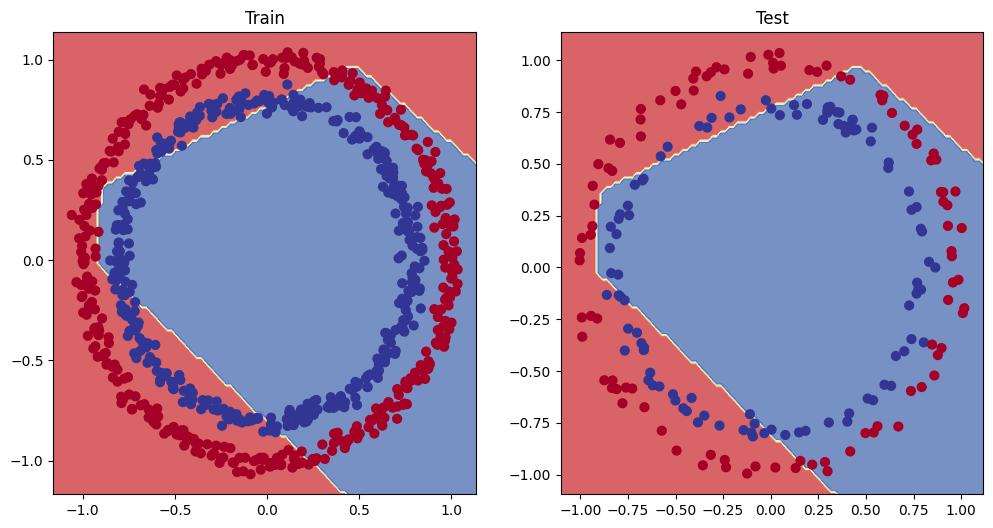

In [44]:
# Now we are keeping the same model strucutre as model0 except just adding ReLU actication

class ClassificationNonLinearModelBase(nn.Module):

  def __init__(self):
    super().__init__()

    self.Layer1 = nn.Linear(in_features=2, out_features=5)
    self.Layer2 = nn.Linear(in_features=5, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, X):
    return self.Layer2(self.relu(self.Layer1(X)))

model2 = ClassificationNonLinearModelBase().to(device)
optimizer = torch.optim.SGD(params=model2.parameters(),lr = 0.1)

epochs = 1000

for epoch in range(epochs):

  model2.train()
  y_logits = model2(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_preds)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  model2.eval()
  with torch.inference_mode():
      test_logits = model2(X_test).squeeze()
      test_preds = torch.round(torch.sigmoid(test_logits))

      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_test, test_preds)

  if epoch % 100 == 0:
    print(f'Epoch : {epoch} | Loss : {loss:.5f} | Accuracy : {acc:.2f}% | Test Loss : {test_loss}:.5f | Test Accuracy  : {test_acc:.2f}%')


print('\n')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model2, X_test, y_test)

Now as we can see adding ReLU activation and increasing the trainig epoch, it's does affect the model performance, and adding more layer itself (hidden) gives best result.

#### **Multi Class Classification**


Let's Scale above learnings to Multi class classificaton problem

__Data__

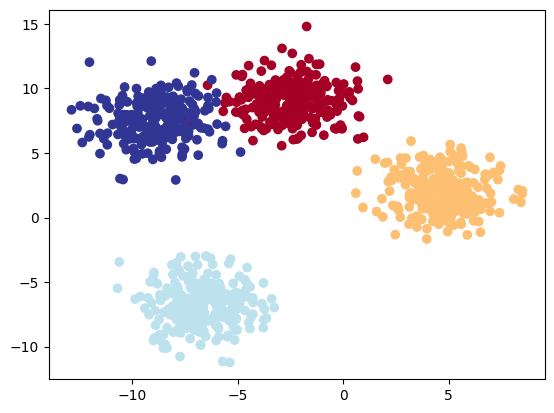

In [47]:
from sklearn.datasets import make_blobs


# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

let's create a subclass of nn.Module that takes in three hyperparameters:

    input_features - the number of X features coming into the model.
    output_features - the ideal numbers of output features we'd like (this will be equivalent to NUM_CLASSES or the number of classes in your multi-class classification problem).
    hidden_units - the number of hidden neurons we'd like each hidden layer to use.


In [48]:
# Build model

class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):

        """
        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
            hidden_units (int): Number of hidden units between layers, default 8.
        """

        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_features),
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_3 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)
model_3

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [50]:
loss_fn = nn.CrossEntropyLoss() # multi-class classification
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)

In [51]:
torch.manual_seed(42)

epochs = 100

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):

    model_3.train()

    y_logits = model_3(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # because this is multiclass and we need value with highest prob


    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,y_pred=y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    model_3.eval()
    with torch.inference_mode():
      test_logits = model_3(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,y_pred=test_pred)


    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.58036, Acc: 25.12% | Test Loss: 0.61501, Test Acc: 71.50%
Epoch: 10 | Loss: 0.14878, Acc: 98.62% | Test Loss: 0.13241, Test Acc: 99.50%
Epoch: 20 | Loss: 0.08347, Acc: 99.00% | Test Loss: 0.07452, Test Acc: 99.50%
Epoch: 30 | Loss: 0.06192, Acc: 99.00% | Test Loss: 0.05375, Test Acc: 99.50%
Epoch: 40 | Loss: 0.05150, Acc: 99.00% | Test Loss: 0.04336, Test Acc: 99.50%
Epoch: 50 | Loss: 0.04546, Acc: 99.00% | Test Loss: 0.03718, Test Acc: 99.50%
Epoch: 60 | Loss: 0.04154, Acc: 99.00% | Test Loss: 0.03310, Test Acc: 99.50%
Epoch: 70 | Loss: 0.03882, Acc: 99.00% | Test Loss: 0.03021, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03683, Acc: 99.00% | Test Loss: 0.02807, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03531, Acc: 99.00% | Test Loss: 0.02640, Test Acc: 99.50%


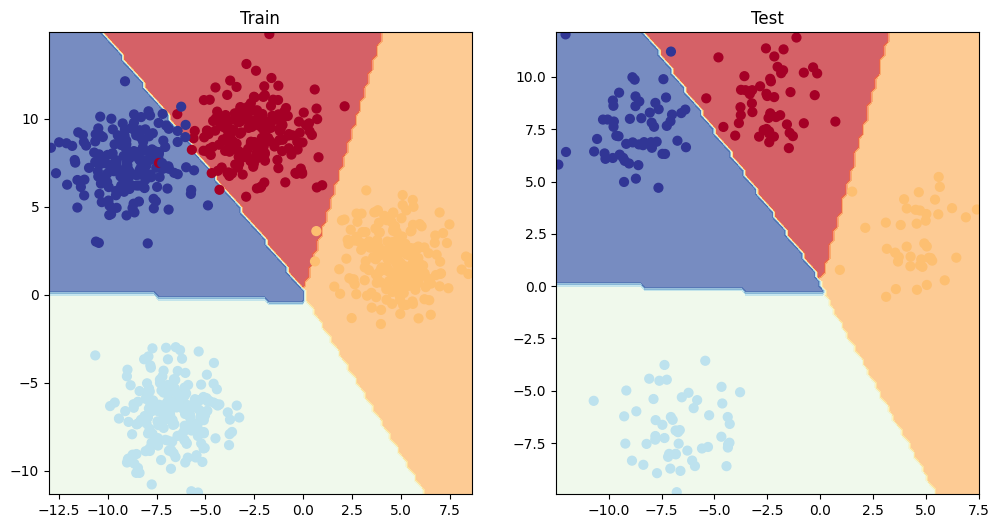

In [52]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_blob_test, y_blob_test)

------